In [1]:
#importing necessary libraries
import cv2
import tensorflow as tf
import os
import glob
from matplotlib import pyplot as plt

D:\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [10]:
imdir = ".\\Class1-MultipartCharacter-po1"
outdir = ".\\Class2-NonMultipartCharcaters"

In [11]:
#prepare(file) allows us to use an image of any size, since it automatically resize it to the image size we defined in the first program.
def prepare(file):
    IMG_SIZE = 50
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [12]:
#hconcat_resize_min() takes the image list as an argument and resizes the image to the maximum height in the list
#and concatenates them horizontally
def hconcat_resize_min(im_list, interpolation=cv2.INTER_CUBIC):
    h_max = max(im.shape[0] for im in im_list)
    im_list_resize = [cv2.resize(im, (int(im.shape[1] * h_max / im.shape[0]), h_max), interpolation=interpolation)
                      for im in im_list]
    return cv2.hconcat(im_list_resize)

In [13]:
model = tf.keras.models.load_model("CNN.model") # Loding pre-trained data trained at Harshit's machine

In [14]:
filelist = glob.glob(os.path.join(imdir, '*.jpg')) #reading all the files in image directory

j=0
for i in range(len(filelist)):
    image = prepare(filelist[i]) #Single image that you want to predict
    prediction = model.predict([image]) #predicting if the image is part of multicharacter or not
    prediction = list(prediction[0])
    if(prediction[0]>0.5) and i+1<len(filelist): #if the image belongs to MultipartClass and is not the last image append it to next image
        im1 = cv2.imread(filelist[i])
        print(filelist[i])  #printing file path of all the images classified as MultipartCharacter
        im2 = cv2.imread(filelist[i+1])
        im_h_resize = hconcat_resize_min([im1, im2])
        cv2.imwrite(outdir+"\\"+str(j)+".jpg", im_h_resize)
        j=j+1

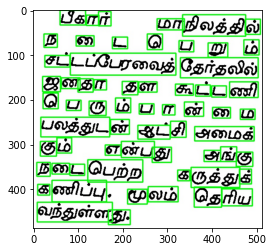

In [15]:
im = cv2.imread('../box.jpg')
cv2.imshow('Output Sample',im)
cv2.waitKey(0)
RGB_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  #opencv reads image in BGR format to display in matplot lib we convert it to RGB
plt.imshow(RGB_im)